# Obtain total downloads and downloads by unique users for a given specimen.
## A first attempt at a comprehensive guide to the stats and figures and data exploration conducted by Team Saucy in June - July 2021.

Written by Annie Xu. Contact her at ax5@rice.edu with questions. This email address will remain valid until roughly April 2024.

## Let's find 2 core metrics: 
1. number of total downloads for a given MorphoSource specimen
2. number of those downloads that are by unique users (as opposed to repeat downloads by the same user).

The two metrics are circled in red. This is a mockup for an example specimen:

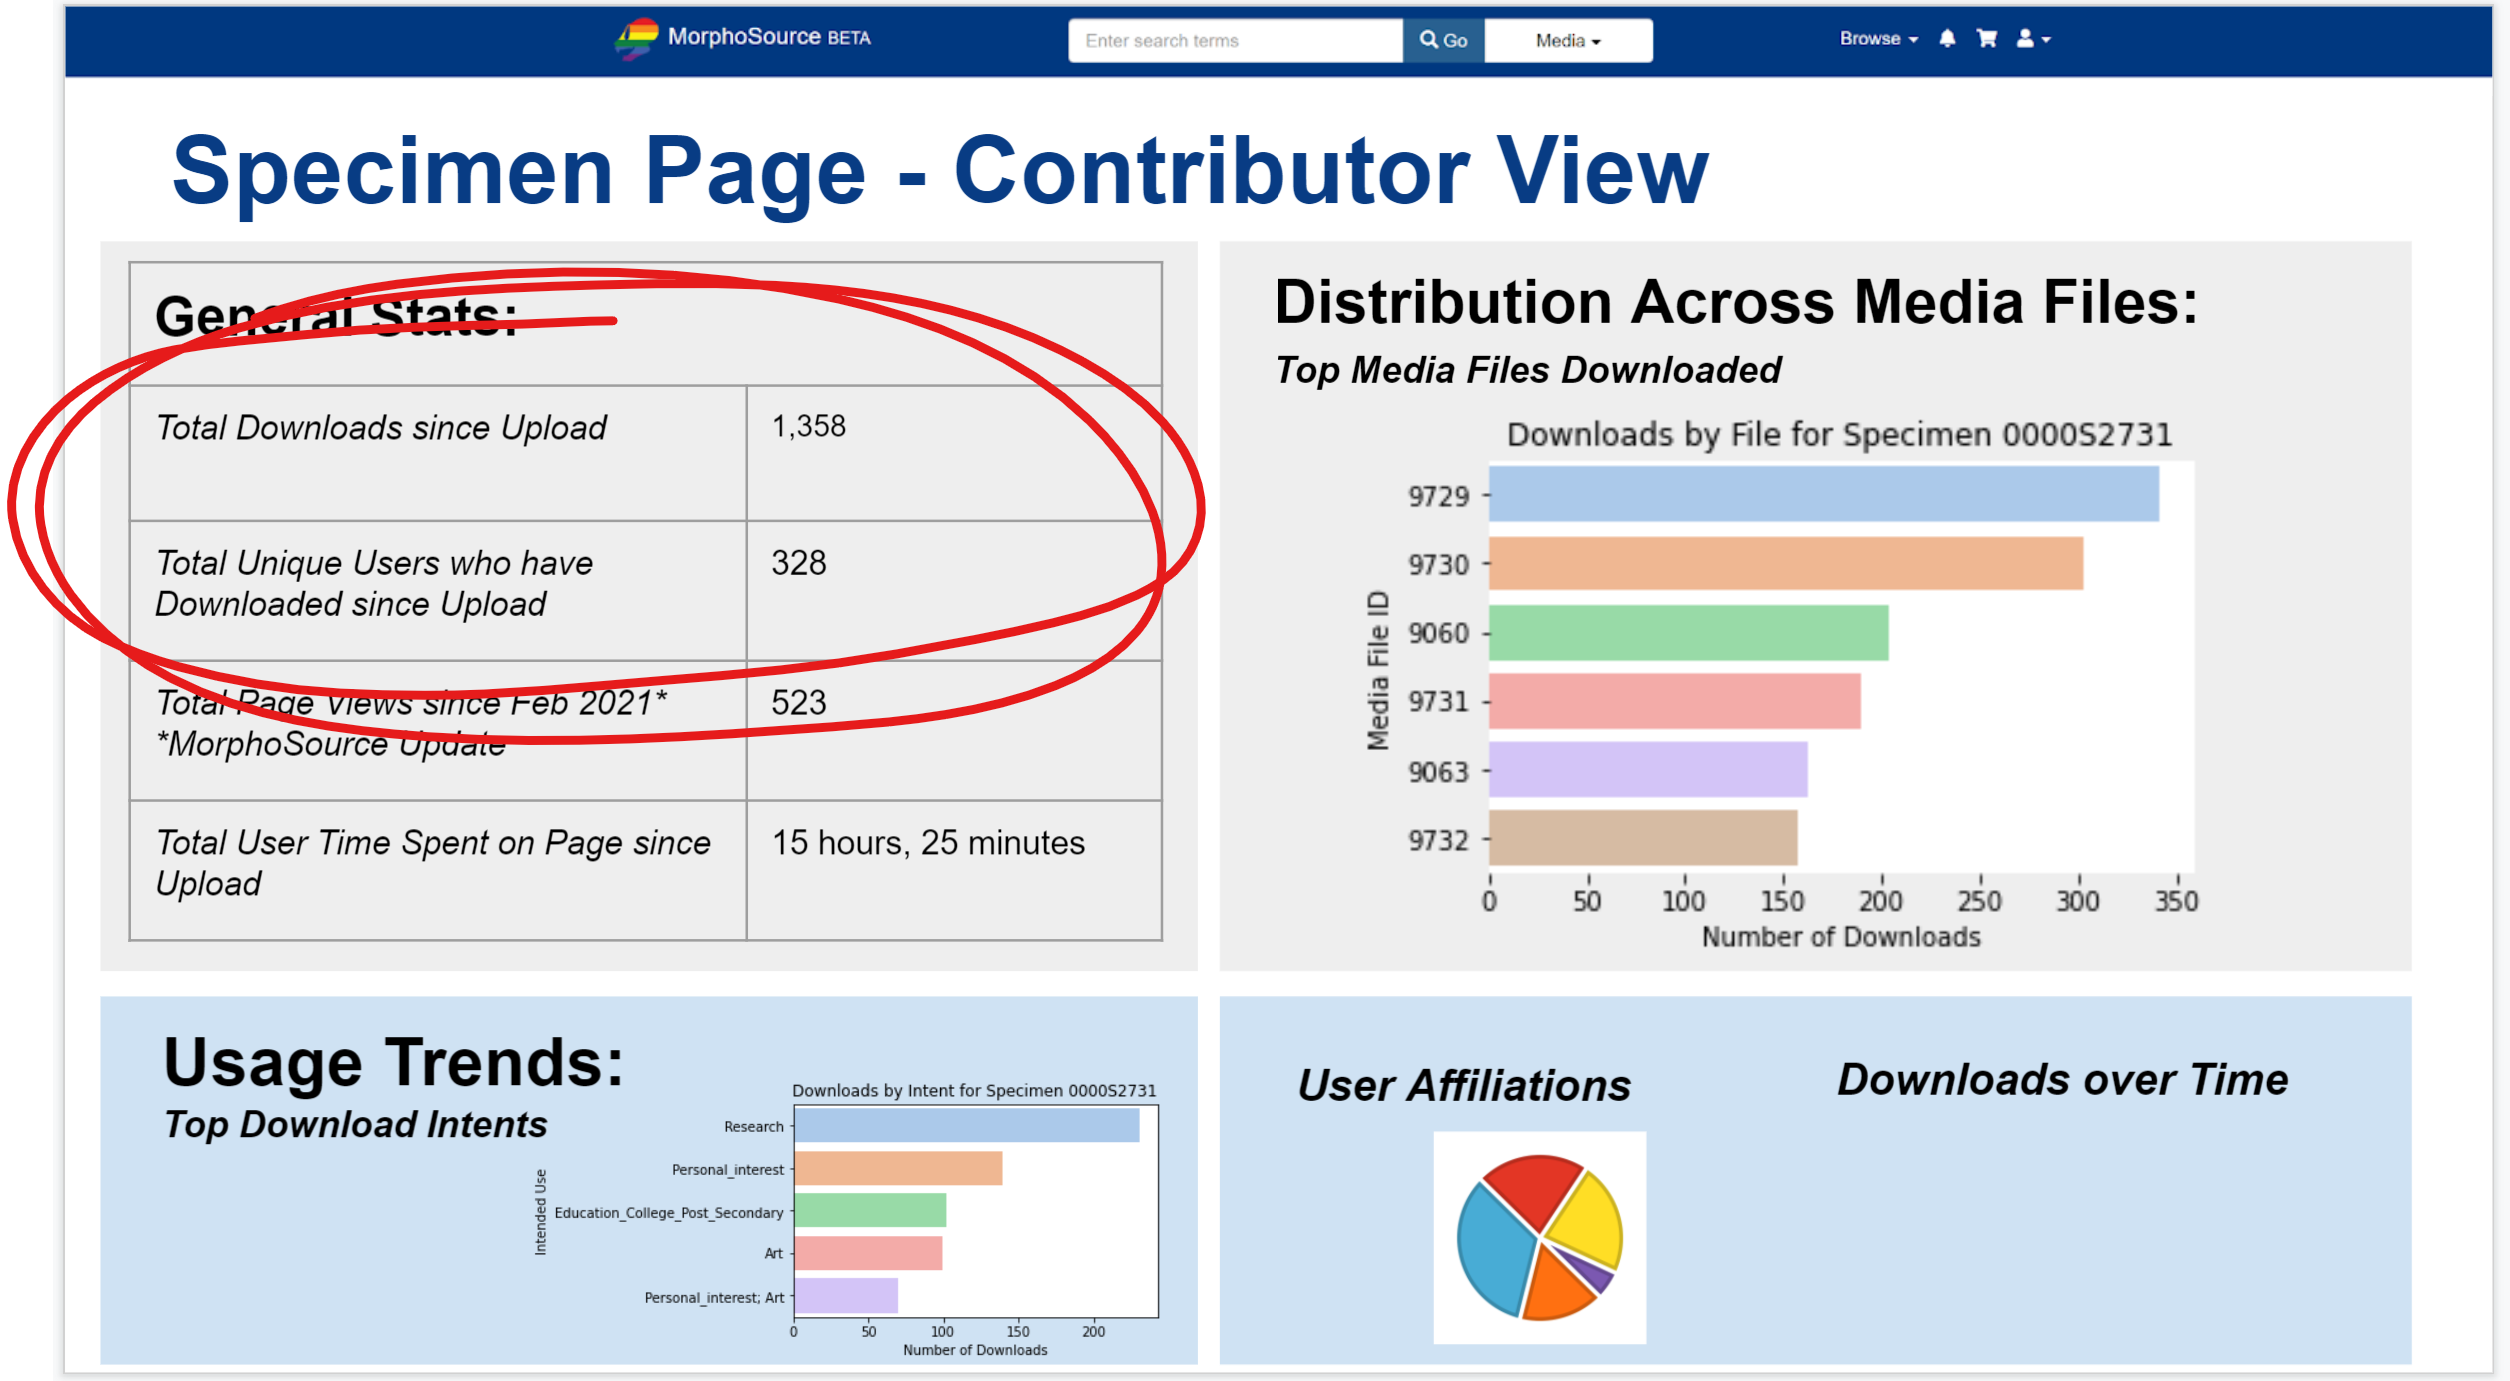

### Data needed:
- rows that each represent a single download of a given media file
- a column that contains a user's 'ms_id'
- a column that contains a media file's 'physical_object_id', indicating which specimen that media corresponds to

### Preparatory steps -

First step: import relevant Python packages/libraries.

In [1]:
#libraries
import pandas as pd  # Python's pandas library does a great job with csv's and other forms of data.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

\
Now: load all relevant datasets.\
*Note:* A guide to creating the "merged_df" and "merged_df_copy" (it's the same file) should be forthcoming. This merged dataset is useful for finding specimen downloads because, unlike the original ms2_media_search csv, it contains 'physical_object_id' for each download recorded. Keep an eye out for it! 

In [2]:
#data
merged_df = pd.read_csv(r"C:\Users\annie\Desktop\data sci\data+\annie_merged_cart_items_ms2_media_search.csv", low_memory = False)

#other datasets that we may not need for this notebook and these outcomes, but may need for others.
#merged_df_copy = pd.read_csv(r"C:\Users\annie\Desktop\data sci\data+\annie_merged_cart_items_ms2_media_search.csv", low_memory = False)
# ms1_downloads = pd.read_csv(r"first_exploration_data\usage-data-main\ms1_downloads_intended_use.csv")
# cart_items = pd.read_csv(r"first_exploration_data\usage-data-main\cart_items.csv", low_memory=False)
# users = pd.read_csv(r'first_exploration_data\usage-data-main\users.csv', header = 1)
# ms2_media_search = pd.read_csv(r'first_exploration_data\ms2_media_search_with_facilities.csv')

\
Next: Let's make sure we're only including downloads that no longer have the item in-cart. We can modify "merged_df" a little by slicing for rows that have in-cart = False.

In [3]:
merged_df = merged_df[merged_df['in_cart'] == False] #store it back into the original variable name.

\
Finally...take a look to make sure our datasets (I call them dataframes) look like what we expect them to!

In [4]:
#prints the columns of our most important dataframe, "merged_df". I'm specifically looking to make sure that
#the rows 'work_id' and 'physical_object_id' are both there.
merged_df.columns

Index(['Unnamed: 0', 'id_x', 'work_id', 'created_at', 'updated_at',
       'date_downloaded', 'in_cart', 'date_requested', 'date_approved',
       'date_denied', 'date_canceled', 'date_expired', 'use', 'date_cleared',
       'user_id', 'action_by', 'reviewers', 'id_y', 'title', 'media_type',
       'modality', 'device_facility', 'physical_object_id',
       'physical_object_title', 'physical_object_organization',
       'physical_object_type', 'physical_object_taxonomy', 'short_description',
       'description', 'part', 'in_collections', 'ark', 'doi', 'date_uploaded',
       'date_modified', 'legacy_media_group_id', 'legacy_media_file_id'],
      dtype='object')

### Core steps - 

Now, let's find the total downloads for a given specimen. In this case, we're looking at the specimen that corresponds to 'physical_object_id' 0000S2731. \
Slice for the desired specimen by inserting the relevant 'physical_object_id' into a boolean expression and filtering the downloads using that expression.

In [5]:
cart_items_000S2731 = merged_df[merged_df['physical_object_id'] == '0000S2731'] #1358 rows, which indicates 1358 downloads. Nice!
print('Total downloads for this specimen:')
cart_items_000S2731.shape[0] #will give you the number of rows in the sliced dataframe.

Total downloads for this specimen:


1358

Next, count then number of unique users who downloaded that specimen. \
We now pull all the 'user_id's from the dataframe slice that we just created. Then, we check how many unique 'user_id's exist.

In [6]:
print('Total unique users who downloaded this specimen:')
len(cart_items_000S2731['user_id'].unique()) #328 unique users! cool.

Total unique users who downloaded this specimen:


328